In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib as mpl

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from hbmep.config import Config
from hbmep.model.utils import Site as site

from models import HBe
from constants import (
    TOML_PATH,
    DATA_PATH,
    BUILD_DIR,
    INFERENCE_FILE,
    MODEL_FILE,
)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


In [2]:
def load(build_dir, ref=0):
    src = os.path.join(build_dir, "inference.pkl")
    with open(src, "rb") as f:
        df, encoder_dict, _, posterior_samples, = pickle.load(f)

    src = os.path.join(build_dir, MODEL_FILE)
    with open(src, "rb") as f:
        model, = pickle.load(f)

    print(encoder_dict[model.features[1]].classes_)

    param = posterior_samples["a_delta_loc"]
    plt.figure(figsize=(5, 3))
    for j in range(param.shape[-1]):
        sns.kdeplot(param[:, j], label=f"{j} {encoder_dict[model.features[1]].classes_[j + 1]}")
    plt.axvline(x=0, color="black", linestyle="--")
    plt.legend(bbox_to_anchor=(.8, 1.05));

    for j in range(param.shape[-1]):
        if j == ref: continue
        prob = (np.random.permutation(param[:, ref]) < np.random.permutation(param[:, j])).mean()
        print(f"{j} {encoder_dict[model.features[1]].classes_[j + 1]} {prob}")

    return df, encoder_dict, model, posterior_samples


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[' -C' 'E-W' 'NE-SW' 'S-N' 'SE-NW']
0 E-W 1.0
1 NE-SW 1.0
3 SE-NW 1.0


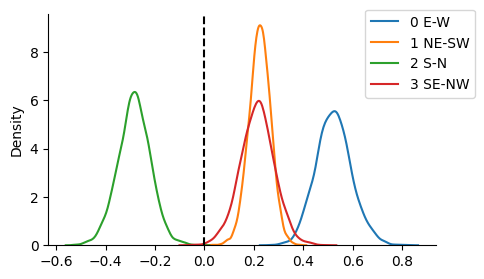

In [ ]:
build_dir = "/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_CIRC/mvn_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/diam"
df, encoder_dict, model, posterior_samples = load(build_dir, ref=2)


[' -C' 'E-C' 'N-C' 'NE-C' 'NW-C' 'S-C' 'SE-C' 'SW-C' 'W-C']
0 E-C 1.0
1 N-C 0.99975
2 NE-C 1.0
3 NW-C 1.0
5 SE-C 1.0
6 SW-C 1.0
7 W-C 1.0


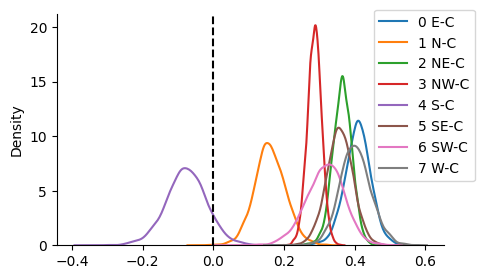

In [4]:
build_dir = "/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_CIRC/mvn_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/radii"
df, encoder_dict, model, posterior_samples = load(build_dir, ref=4)


[' S-N' '-C' '-E' '-N' '-NE' '-NW' '-S' '-SE' '-SW' '-W']
0 -C 0.9465
1 -E 1.0
2 -N 0.99925
3 -NE 1.0
4 -NW 1.0
6 -SE 1.0
7 -SW 1.0
8 -W 1.0


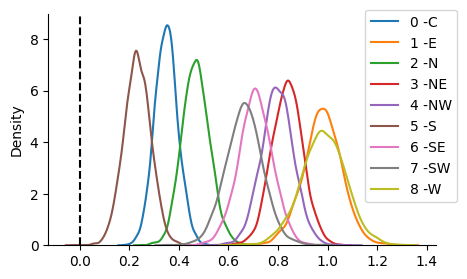

In [5]:
build_dir = ""
df, encoder_dict, model, posterior_samples = load(build_dir, ref=5)


In [ ]:
build_dir = "/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_SHIE/mvn_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/with-ground"






An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


(4000, 3)
[' -C___Biphasic' '-C___Pseudo-Mono' 'C-___Biphasic' 'C-___Pseudo-Mono']


[' -C' 'E-W' 'NE-SW' 'S-N' 'SE-NW']
0 E-W 1.0
1 NE-SW 1.0
3 SE-NW 0.99975


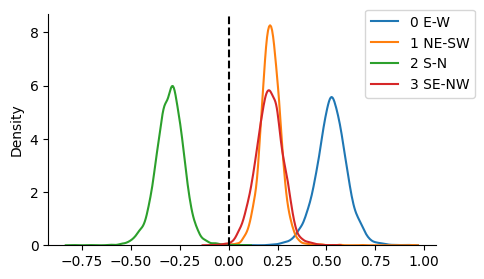

In [6]:
build_dir = "/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_CIRC/mvn_hb_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/diam"
df, encoder_dict, model, posterior_samples = load(build_dir, ref=2)

[' -C' 'E-C' 'N-C' 'NE-C' 'NW-C' 'S-C' 'SE-C' 'SW-C' 'W-C']
0 E-C 0.99975
1 N-C 0.9885
2 NE-C 0.99925
3 NW-C 0.9985
5 SE-C 0.99925
6 SW-C 0.9935
7 W-C 0.9995


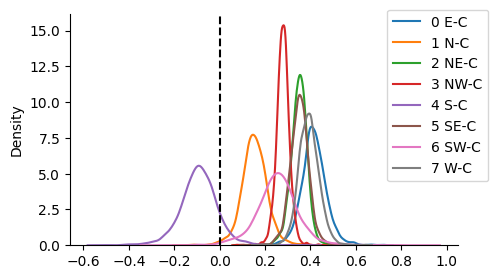

In [7]:
build_dir = "/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_CIRC/mvn_hb_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/radii"
df, encoder_dict, model, posterior_samples = load(build_dir, ref=4)


In [8]:
build_dir = "/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_CIRC/mvn_hb_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/vertices"
df, encoder_dict, model, posterior_samples = load(build_dir, ref=5)


FileNotFoundError: [Errno 2] No such file or directory: '/home/vishu/repos/rat-mapping-paper/reports/log-hierarchical/L_CIRC/mvn_hb_reference/4000W_4000S_4C_4T_20D_0.95A_mixtureFalse/vertices/inference.pkl'